In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## In this example, monthly analyses were conducted for investments made in the months when the currency exchange rate was at its highest
## and lowest. An initial amount of 10,000 was assumed, with the purchase and sale prices of the currency being the same as the exchange 
## rate value.

In [3]:
high_low = pd.read_excel('data/high_low.xlsx', index_col=0)
percentage_changes = pd.read_excel('data/percent_changes.xlsx', index_col=0)

percentage_changes = percentage_changes.reset_index()

In [4]:
initial_investment = 10000
investment_results = []

for currency in high_low.index:
   
    max_date = high_low.loc[currency, 'max_date']
    max_value = high_low.loc[currency, 'max_value']
    min_date = high_low.loc[currency, 'min_date']
    min_value = high_low.loc[currency, 'min_value']
    
    max_change_row = percentage_changes.loc[percentage_changes['Date'] == max_date, currency]
    min_change_row = percentage_changes.loc[percentage_changes['Date'] == min_date, currency]
    
    if not max_change_row.empty:
        max_change = max_change_row.values[0]
        max_final_value = initial_investment*(1+(max_change / 100))
        max_profit = max_final_value - initial_investment
        max_return = (max_profit / initial_investment)*100
    else:
        max_change = None
        max_final_value = None
        max_profit = None
        max_return = None
    
    if not min_change_row.empty:
        min_change = min_change_row.values[0]
        min_final_value = initial_investment*(1+(min_change / 100))
        min_profit = min_final_value - initial_investment
        min_return = (min_profit / initial_investment)*100
    else:
        min_change = None
        min_final_value = None
        min_profit = None
        min_return = None
    
    investment_results.append({
        'Currency': currency,
        'Max Rate Month': max_date.strftime('%m.%Y') if isinstance(max_date, pd.Timestamp) else max_date,
        'Max Rate Value': max_value,
        'Max Rate Change (%)': max_change,
        'Final Value (Max Rate)': max_final_value,
        'Max Rate Profit': max_profit,
        'Max Rate Return (%)': max_return,
        'Min Rate Month': min_date.strftime('%m.%Y') if isinstance(min_date, pd.Timestamp) else min_date,
        'Min Rate Value': min_value,
        'Min Rate Change (%)': min_change,
        'Final Value (Min Rate)': min_final_value,
        'Min Rate Profit': min_profit,
        'Min Rate Return (%)': min_return
    })

In [5]:
min_max_investment_analysis = pd.DataFrame(investment_results)
min_max_investment_analysis.set_index('Currency', inplace=True)
min_max_investment_analysis

,Max Rate Month,Max Rate Value,Max Rate Change (%),Final Value (Max Rate),Max Rate Profit,Max Rate Return (%),Min Rate Month,Min Rate Value,Min Rate Change (%),Final Value (Min Rate),Min Rate Profit,Min Rate Return (%)
Currency,,,,,,,,,,,,
CHF,9.2023,4.7908,2.96,10296.0,296.0,2.96,5.2024,4.3533,-1.26,9874.0,-126.0,-1.26
EUR,9.2023,4.5977,3.09,10309.0,309.0,3.09,5.2024,4.2800,-0.53,9947.0,-53.0,-0.53
GPB,9.2023,5.3353,2.71,10271.0,271.0,2.71,5.2024,5.0006,-0.47,9953.0,-47.0,-0.47
USD,9.2023,4.3033,5.27,10527.0,527.0,5.27,5.2024,3.9585,-1.31,9869.0,-131.0,-1.31
AUD,9.2023,2.7645,4.27,10427.0,427.0,4.27,3.2024,2.5975,-0.77,9923.0,-77.0,-0.77
UAH,10.2023,0.1169,0.26,10026.0,26.0,0.26,6.2024,0.0992,-0.30,9970.0,-30.0,-0.30
NOK,9.2023,0.4013,2.69,10269.0,269.0,2.69,4.2024,0.3683,-1.45,9855.0,-145.0,-1.45


In [6]:
min_max_investment_analysis.to_excel('data/min_max_investment_analysis.xlsx')

<Figure size 1200x600 with 0 Axes>

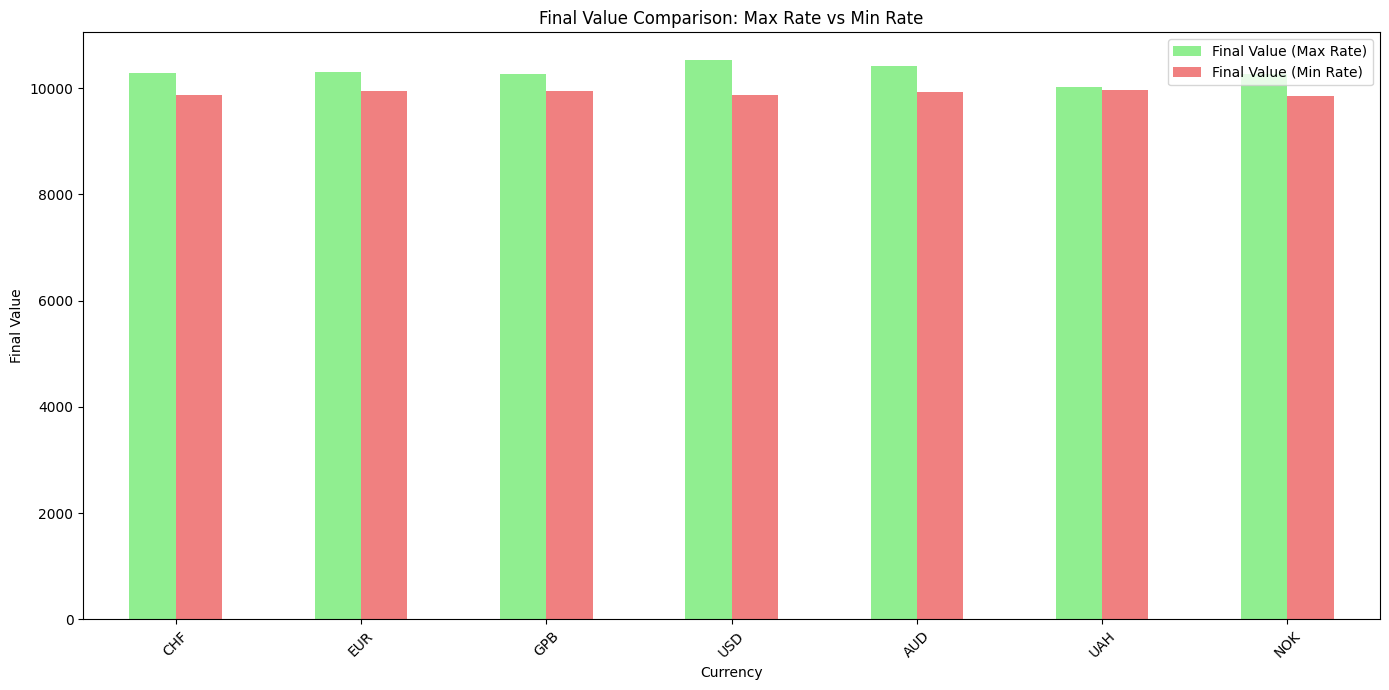

<Figure size 1200x600 with 0 Axes>

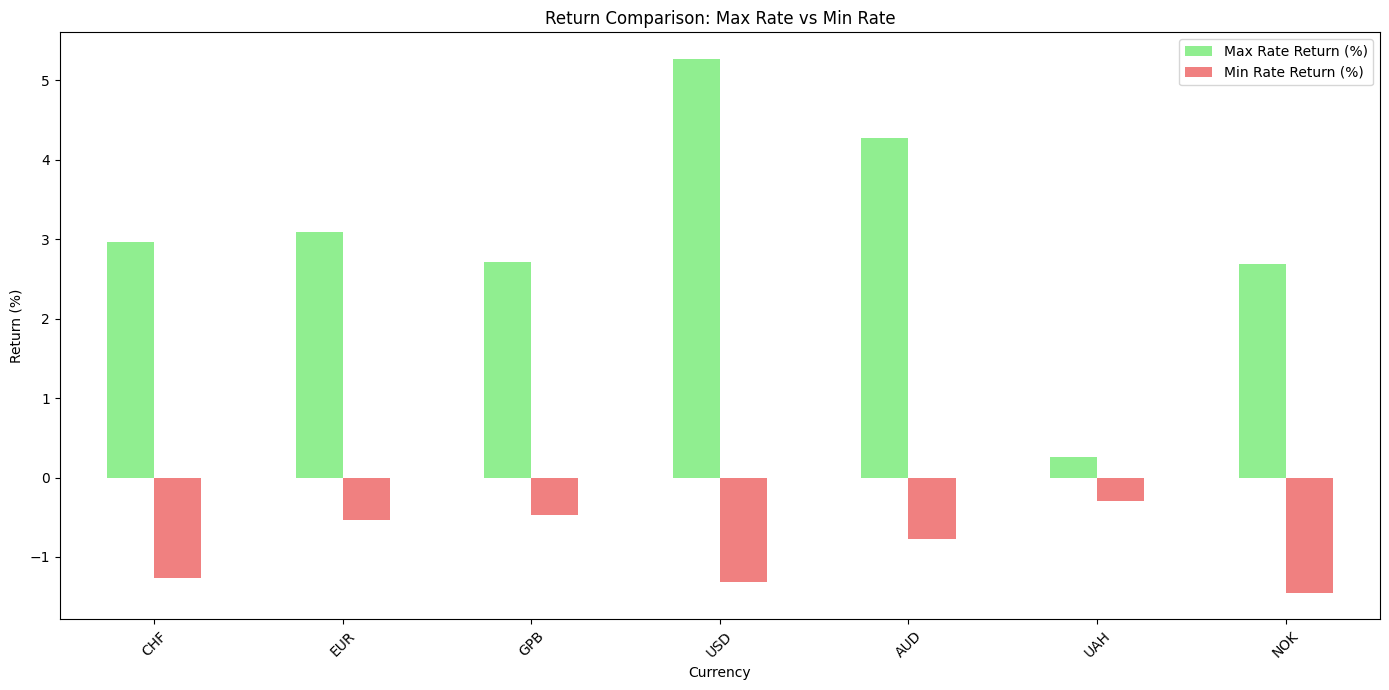

In [7]:
plt.figure(figsize=(12, 6))
ax = min_max_investment_analysis[['Final Value (Max Rate)', 'Final Value (Min Rate)']].plot(kind='bar', color=['lightgreen', 'lightcoral'], figsize=(14, 7))
plt.title('Final Value Comparison: Max Rate vs Min Rate')
plt.xlabel('Currency')
plt.ylabel('Final Value')
plt.xticks(rotation=45)
plt.legend(['Final Value (Max Rate)', 'Final Value (Min Rate)'])

plt.tight_layout()
plt.savefig('data/min_max_final_value_comparison.pdf')
plt.show()

plt.figure(figsize=(12, 6))
ax = min_max_investment_analysis[['Max Rate Return (%)', 'Min Rate Return (%)']].plot(kind='bar', color=['lightgreen', 'lightcoral'], figsize=(14, 7))
plt.title('Return Comparison: Max Rate vs Min Rate')
plt.xlabel('Currency')
plt.ylabel('Return (%)')
plt.xticks(rotation=45)
plt.legend(['Max Rate Return (%)', 'Min Rate Return (%)'])

plt.tight_layout()
plt.savefig('data/min_max_return_comparison.pdf')
plt.show()